[*********************100%***********************]  1 of 1 completed


Normality Test Statistic: 466.2401, p-value: 5.7181e-102


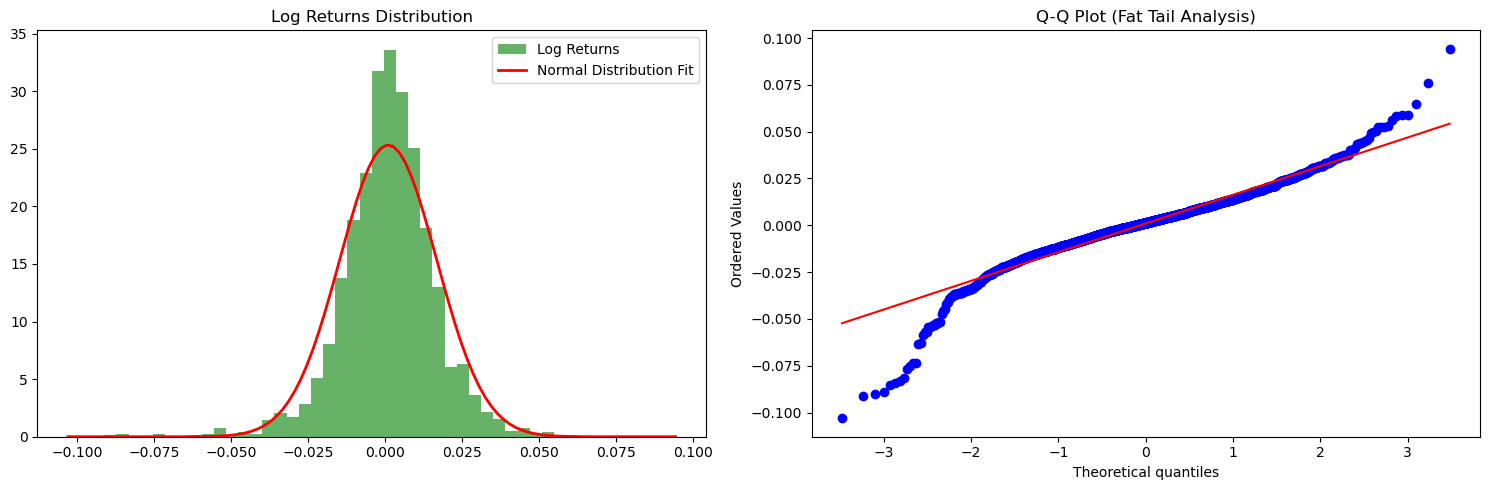

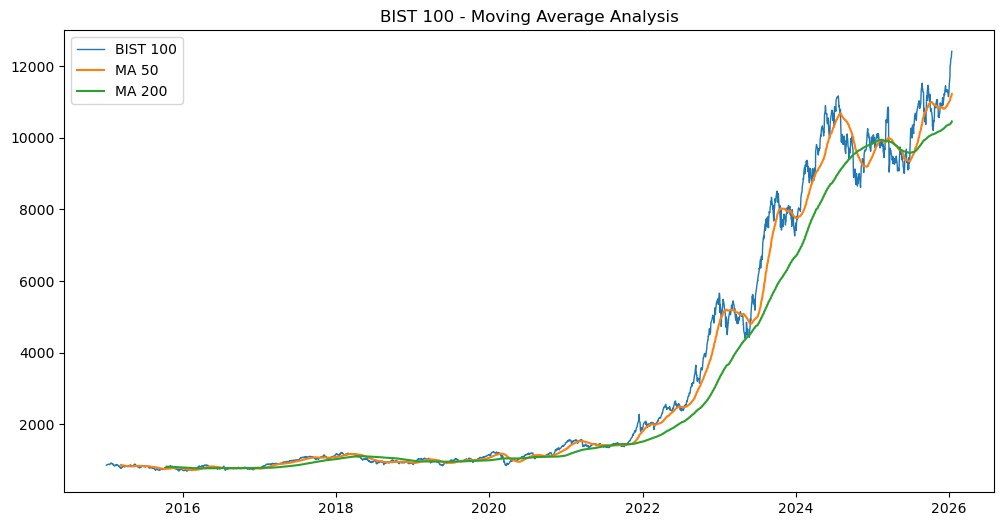

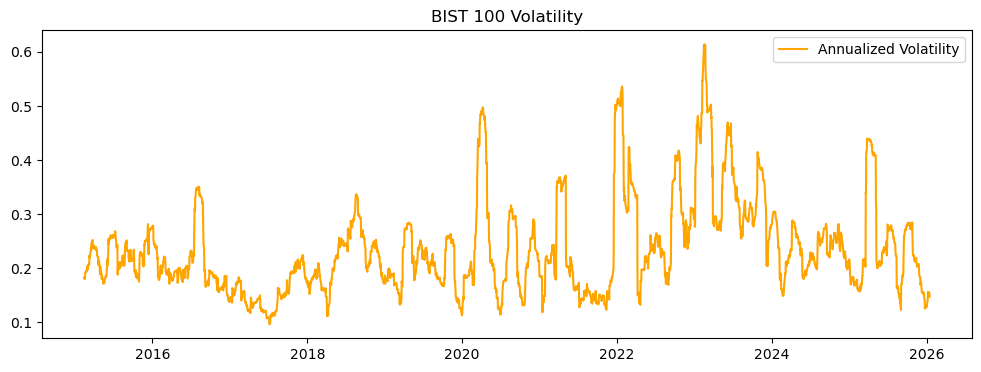

In [1]:
"""
BIST 100 Technical & Normality Analysis
Author: Cansu Yıldırım
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# -------------------------------------------------
# DATA DOWNLOAD
# -------------------------------------------------
SYMBOL = "XU100.IS"
START_DATE = "2015-01-01"

data = yf.download(SYMBOL, start=START_DATE)
df = data[['Close']].dropna()

# -------------------------------------------------
# LOG RETURNS
# -------------------------------------------------
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
returns = df['Log_Return'].dropna()

# -------------------------------------------------
# NORMALITY & RISK TESTS
# -------------------------------------------------
stat, p = stats.normaltest(returns)
print(f'Normality Test Statistic: {stat:.4f}, p-value: {p:.4e}')

# -------------------------------------------------
# MOVING AVERAGES
# -------------------------------------------------
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# -------------------------------------------------
# VOLATILITY (ANNUALIZED)
# -------------------------------------------------
df['Volatility'] = df['Log_Return'].rolling(30).std() * np.sqrt(252)

# -------------------------------------------------
# VISUALIZATION
# -------------------------------------------------

# Dağılım ve Q-Q Analizi
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

mu, std = returns.mean(), returns.std()
x = np.linspace(returns.min(), returns.max(), 100)
p_norm = stats.norm.pdf(x, mu, std)

ax[0].hist(returns, bins=50, density=True, alpha=0.6, color='g', label='Log Returns')
ax[0].plot(x, p_norm, 'r', linewidth=2, label='Normal Distribution Fit')
ax[0].set_title('Log Returns Distribution')
ax[0].legend()

stats.probplot(returns, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot (Fat Tail Analysis)')

plt.tight_layout()
plt.show()

# Fiyat ve MA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='BIST 100', linewidth=1)
plt.plot(df['MA_50'], label='MA 50')
plt.plot(df['MA_200'], label='MA 200')
plt.title('BIST 100 - Moving Average Analysis')
plt.legend()
plt.show()

# Volatilite
plt.figure(figsize=(12, 4))
plt.plot(df['Volatility'], label='Annualized Volatility', color='orange')
plt.title('BIST 100 Volatility')
plt.legend()
plt.show()